In [55]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"
sns.set_style("white")
sns.set_palette("Paired")

In [2]:
results = []

for dataset in ["cora", "citeseer", "pubmed", "peptides_func", "peptides_struct"]:
    for model in ["GCN", "GAT", "GIN", "SAN"]:
        res_dict = {"dataset": dataset, "model": model}
        if model == "SAN":
            res_dict["epochs"] = 30
        else:
            res_dict["epochs"] = 100
        try:
            with open(f"../results/{dataset}_{model}/agg/val/best.json", "r") as f:
                print(f"{dataset.title()} - {model}")
                res = json.load(f)
                try:
                    print(f"F1: {res['f1']} +/- {res['f1_std']}\n")
                    print(f"Accuracy: {res['accuracy']} +/- {res['accuracy_std']}")
                    res_dict["metric"] = "Accuracy"
                    res_dict["value"] = res["accuracy"]
                    res_dict["value_std"] = res["accuracy_std"]
                except KeyError:
                    if dataset == "peptides_func":
                        res_dict["metric"] = "AP"
                        res_dict["value"] = res["ap"]
                        res_dict["value_std"] = res["ap_std"]
                        print(f"AP: {res['ap']} +/- {res['ap_std']}\n")
                    else:
                        res_dict["metric"] = "MAE"
                        res_dict["value"] = res["mae"]
                        res_dict["value_std"] = res["mae_std"]
                        print(f"MAE: {res['mae']} +/- {res['mae_std']}\n")
                f.close()
            results.append(res_dict)
        except FileNotFoundError:
            continue

Cora - GCN
F1: 0.73051 +/- 0.05064

Accuracy: 0.80689 +/- 0.02734
Cora - GAT
F1: 0.86237 +/- 0.01657

Accuracy: 0.87577 +/- 0.01058
Cora - GIN
F1: 0.65087 +/- 0.16324

Accuracy: 0.76999 +/- 0.07239
Citeseer - GCN
F1: 0.65938 +/- 0.02457

Accuracy: 0.73974 +/- 0.01722
Citeseer - GAT
F1: 0.72079 +/- 0.00566

Accuracy: 0.77778 +/- 0.00736
Citeseer - GIN
F1: 0.61412 +/- 0.02352

Accuracy: 0.70871 +/- 0.02983
Pubmed - GCN
F1: 0.86851 +/- 0.0104

Accuracy: 0.87272 +/- 0.00922
Pubmed - GAT
F1: 0.85782 +/- 0.00797

Accuracy: 0.86427 +/- 0.00562
Pubmed - GIN
F1: 0.85369 +/- 0.01309

Accuracy: 0.86207 +/- 0.0103
Peptides_Func - GCN
AP: 0.55754 +/- 0.00969

Peptides_Func - GAT
AP: 0.46988 +/- 0.00548

Peptides_Func - GIN
AP: 0.49373 +/- 0.00841

Peptides_Func - SAN
AP: 0.52685 +/- 0.0091

Peptides_Struct - GCN
MAE: 0.35799 +/- 0.00382

Peptides_Struct - GAT
MAE: 0.37165 +/- 0.0049

Peptides_Struct - GIN
MAE: 0.36605 +/- 0.00754

Peptides_Struct - SAN
MAE: 0.303 +/- 0.00779



In [3]:
df = pd.DataFrame(results)

CITATION = ["citeseer", "cora", "pubmed"]
PEPTIDES = ["peptides_func", "peptides_struct"]

<Figure size 1200x800 with 0 Axes>

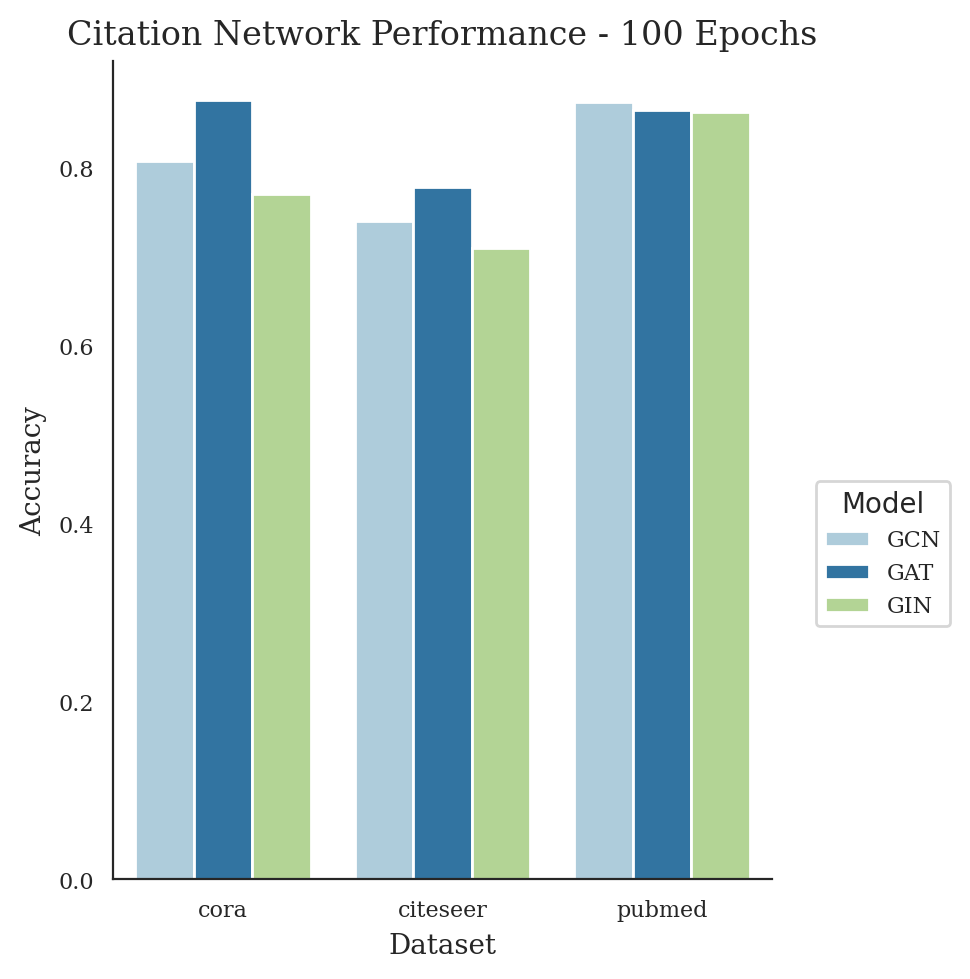

In [41]:
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df[df["dataset"].isin(CITATION)],
    kind="bar",
    x="dataset",
    y="value",
    hue="model",
    legend=False,
)
plt.xlabel("Dataset", fontfamily="serif", fontsize=10)
plt.ylabel("Accuracy", fontfamily="serif", fontsize=10)
plt.title("Citation Network Performance - 100 Epochs", fontfamily="serif", fontsize=12)
sns.despine()
plt.xticks(fontfamily="serif", fontsize=8)
plt.yticks(fontfamily="serif", fontsize=8)
plt.legend(title="Model", prop={"family": "serif", "size": 8}, bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.savefig("plots/citation.pdf")
plt.savefig("plots/citation.png", dpi=300)
plt.show()

/tmp/ipykernel_605915/913164354.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontfamily="serif")


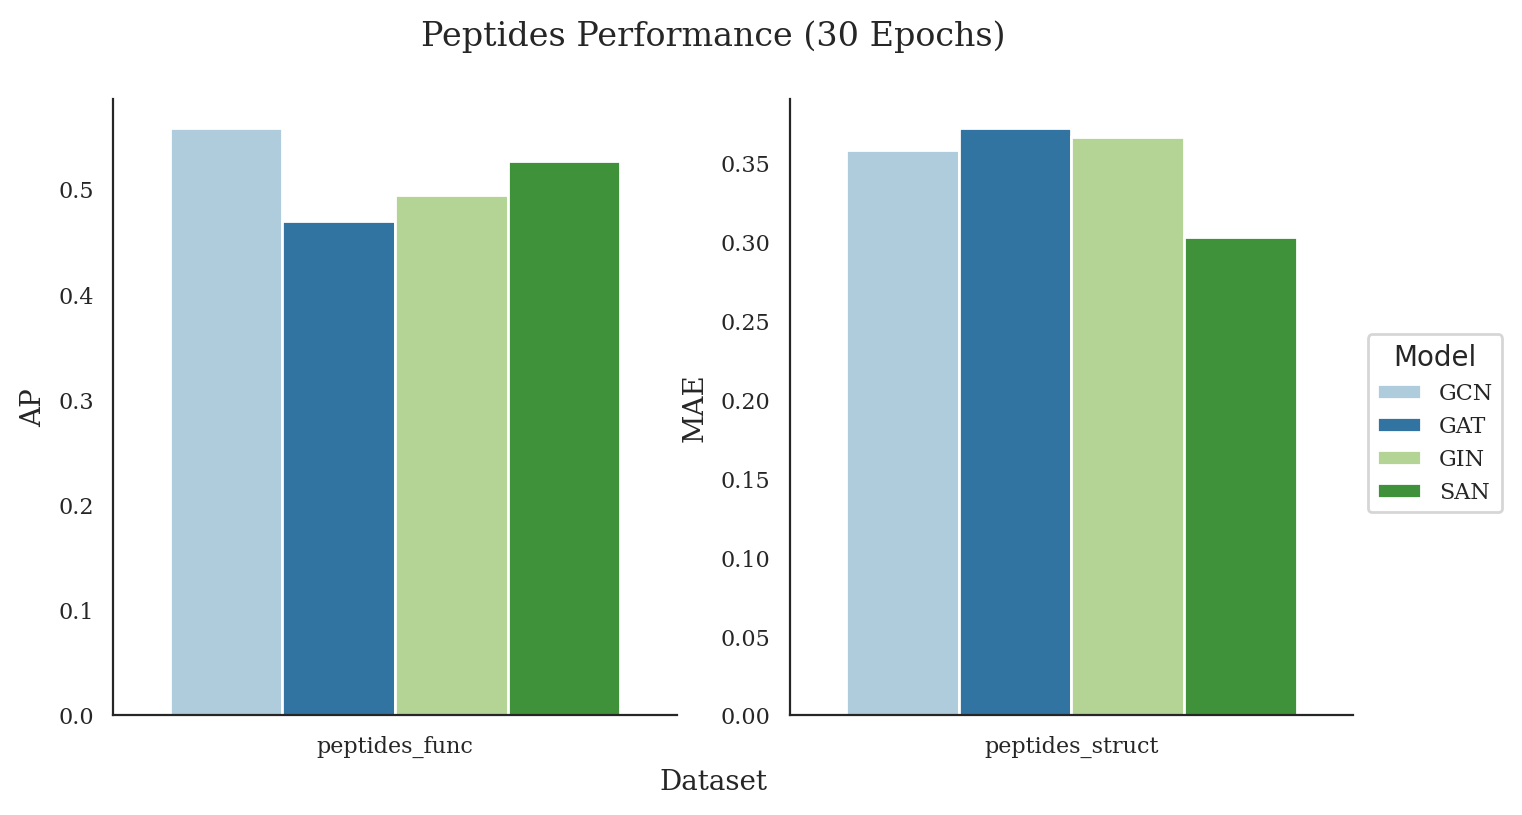

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(
    data=df[df["dataset"] == "peptides_func"],
    x="dataset",
    y="value",
    hue="model",
    ax=ax[0],
)
ax[0].get_legend().remove()
ax[0].set_ylabel("AP", fontfamily="serif", fontsize=10)
ax[0].set_xlabel(None)
sns.barplot(
    data=df[df["dataset"] == "peptides_struct"],
    x="dataset",
    y="value",
    hue="model",
    ax=ax[1],
)
handles, labels = ax[0].get_legend_handles_labels()
ax[1].get_legend().remove()
ax[1].set_ylabel("MAE", fontfamily="serif", fontsize=10)
ax[1].set_xlabel(None)

for ax in ax.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, fontfamily="serif")
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontfamily="serif")

fig.supxlabel("Dataset", fontfamily="serif", fontsize=10)
fig.legend(
    handles,
    labels,
    title="Model",
    prop={"family": "serif", "size": 8},
    bbox_to_anchor=(1, 0.6),
)

sns.despine()
plt.suptitle("Peptides Performance (30 Epochs)", fontfamily="serif", fontsize=12)
plt.savefig("plots/peptides.pdf")
plt.savefig("plots/peptides.png", dpi=300)
plt.show()

In [47]:
ax.get_legend_handles_labels()[1]

['GCN', 'GAT', 'GIN', 'SAN']